In [1]:
import numpy as np
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import pickle  
%matplotlib inline  

In [2]:
directory = r"C:\Users\MMM\Downloads\deep learning - Copy\cats and dogs"
categories = ['dogs','cats']

C:\Users\MMM\Downloads\deep learning - Copy\cats and dogs\dogs\dog.1.jpg
C:\Users\MMM\Downloads\deep learning - Copy\cats and dogs\cats\cat.1.jpg


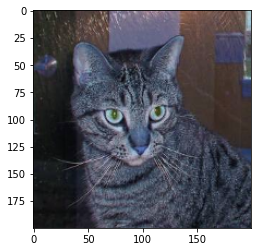

In [3]:
img_size = 200

data = []

for category in categories:
    folder = os.path.join(directory,category)
    labe = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr,(img_size,img_size))
        plt.imshow(img_arr)
        print(img_path)
        break

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r"C:\Users\MMM\Downloads\deep learning - Copy\cats and dogs")
os.listdir()

['cats', 'cat_dog_classifier.keras', 'dogs']

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
!pip install visualkeras

In [7]:
train_dir = r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set"
test_dir  = r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\test_set"

In [8]:
from keras.utils import image_dataset_from_directory
train_generator = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(64, 64), batch_size=32)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 1 classes.


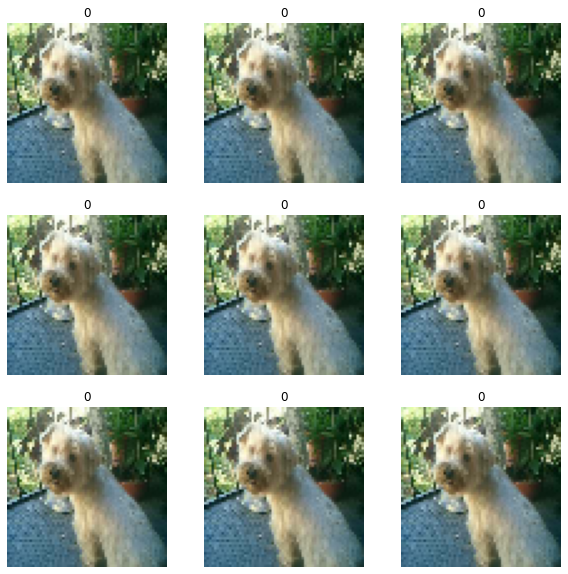

In [9]:
import matplotlib.pyplot as plt

# showing only the first 10 samples of our training data set
plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint16"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [10]:
model = keras.Sequential([
    # Conv layer 1:
    keras.layers.Conv2D(128, (3, 3), input_shape=(64,64,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 2:
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 3:
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    
    # fully connected layers:
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units =1, activation = 'sigmoid')
    
])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics ='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

ValueError: Could not save to JPEG for display

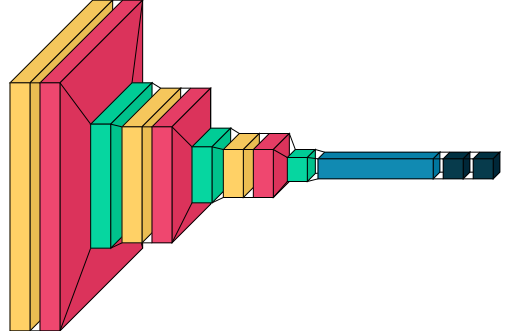

In [11]:
import visualkeras
visualkeras.layered_view(model)

In [12]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
red_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)
logs = model.fit(train_generator, epochs=5, validation_data=test_generator,validation_steps=2000/32, callbacks=[es, red_lr])

Epoch 1/5
251/251 [==============================] - 63s 244ms/step - loss: 0.6521 - accuracy: 0.6550 - val_loss: 1.1004 - val_accuracy: 0.2817 - lr: 0.0010
Epoch 2/5
251/251 [==============================] - 60s 239ms/step - loss: 0.5023 - accuracy: 0.7510 - val_loss: 1.7382 - val_accuracy: 0.2515 - lr: 0.0010
Epoch 3/5
251/251 [==============================] - 63s 252ms/step - loss: 0.4166 - accuracy: 0.8074 - val_loss: 1.1059 - val_accuracy: 0.5139 - lr: 0.0010
Epoch 4/5
250/251 [============================>.] - ETA: 0s - loss: 0.3382 - accuracy: 0.8493
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
251/251 [==============================] - 61s 241ms/step - loss: 0.3386 - accuracy: 0.8491 - val_loss: 1.4229 - val_accuracy: 0.4807 - lr: 0.0010
Epoch 5/5
251/251 [==============================] - 64s 254ms/step - loss: 0.2271 - accuracy: 0.9137 - val_loss: 1.4882 - val_accuracy: 0.5377 - lr: 1.0000e-04


In [13]:
!pip install keras

#### IMPORT THE LIBRARIES

In [14]:
import tensorflow as tf
from tensorflow import keras
import os 
import matplotlib.pyplot as plt

In [15]:
import cv2
import imghdr

In [16]:
image_exts = ['jpeg','jpg','bmp','png']

#### LOAD THE DATSEAT

In [17]:
data_dir = r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set"

In [18]:
X = os.listdir(os.path.join(data_dir,'dogs'))


In [19]:
y = os.listdir(os.path.join(data_dir,'cats'))
cats_and_dogs = X+y

In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        print(image)

cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.1001.jpg
cat.1002.jpg
cat.1003.jpg
cat.1004.jpg
cat.1005.jpg
cat.1006.jpg
cat.1007.jpg
cat.1008.jpg
cat.1009.jpg
cat.101.jpg
cat.1010.jpg
cat.1011.jpg
cat.1012.jpg
cat.1013.jpg
cat.1014.jpg
cat.1015.jpg
cat.1016.jpg
cat.1017.jpg
cat.1018.jpg
cat.1019.jpg
cat.102.jpg
cat.1020.jpg
cat.1021.jpg
cat.1022.jpg
cat.1023.jpg
cat.1024.jpg
cat.1025.jpg
cat.1026.jpg
cat.1027.jpg
cat.1028.jpg
cat.1029.jpg
cat.103.jpg
cat.1030.jpg
cat.1031.jpg
cat.1032.jpg
cat.1033.jpg
cat.1034.jpg
cat.1035.jpg
cat.1036.jpg
cat.1037.jpg
cat.1038.jpg
cat.1039.jpg
cat.104.jpg
cat.1040.jpg
cat.1041.jpg
cat.1042.jpg
cat.1043.jpg
cat.1044.jpg
cat.1045.jpg
cat.1046.jpg
cat.1047.jpg
cat.1048.jpg
cat.1049.jpg
cat.105.jpg
cat.1050.jpg
cat.1051.jpg
cat.1052.jpg
cat.1053.jpg
cat.1054.jpg
cat.1055.jpg
cat.1056.jpg
cat.1057.jpg
cat.1058.jpg
cat.1059.jpg
cat.106.jpg
cat.1060.jpg
cat.1061.jpg
cat.1062.jpg
cat.1063.jpg
cat.1064.jpg
cat.1065.jpg
cat.1066.jpg
cat.1067.jpg
cat.1068.jp

cat.3559.jpg
cat.356.jpg
cat.3560.jpg
cat.3561.jpg
cat.3562.jpg
cat.3563.jpg
cat.3564.jpg
cat.3565.jpg
cat.3566.jpg
cat.3567.jpg
cat.3568.jpg
cat.3569.jpg
cat.357.jpg
cat.3570.jpg
cat.3571.jpg
cat.3572.jpg
cat.3573.jpg
cat.3574.jpg
cat.3575.jpg
cat.3576.jpg
cat.3577.jpg
cat.3578.jpg
cat.3579.jpg
cat.358.jpg
cat.3580.jpg
cat.3581.jpg
cat.3582.jpg
cat.3583.jpg
cat.3584.jpg
cat.3585.jpg
cat.3586.jpg
cat.3587.jpg
cat.3588.jpg
cat.3589.jpg
cat.359.jpg
cat.3590.jpg
cat.3591.jpg
cat.3592.jpg
cat.3593.jpg
cat.3594.jpg
cat.3595.jpg
cat.3596.jpg
cat.3597.jpg
cat.3598.jpg
cat.3599.jpg
cat.36.jpg
cat.360.jpg
cat.3600.jpg
cat.3601.jpg
cat.3602.jpg
cat.3603.jpg
cat.3604.jpg
cat.3605.jpg
cat.3606.jpg
cat.3607.jpg
cat.3608.jpg
cat.3609.jpg
cat.361.jpg
cat.3610.jpg
cat.3611.jpg
cat.3612.jpg
cat.3613.jpg
cat.3614.jpg
cat.3615.jpg
cat.3616.jpg
cat.3617.jpg
cat.3618.jpg
cat.3619.jpg
cat.362.jpg
cat.3620.jpg
cat.3621.jpg
cat.3622.jpg
cat.3623.jpg
cat.3624.jpg
cat.3625.jpg
cat.3626.jpg
cat.3627.jpg
cat.3628

dog.2726.jpg
dog.2727.jpg
dog.2728.jpg
dog.2729.jpg
dog.273.jpg
dog.2730.jpg
dog.2731.jpg
dog.2732.jpg
dog.2733.jpg
dog.2734.jpg
dog.2735.jpg
dog.2736.jpg
dog.2737.jpg
dog.2738.jpg
dog.2739.jpg
dog.274.jpg
dog.2740.jpg
dog.2741.jpg
dog.2742.jpg
dog.2743.jpg
dog.2744.jpg
dog.2745.jpg
dog.2746.jpg
dog.2747.jpg
dog.2748.jpg
dog.2749.jpg
dog.275.jpg
dog.2750.jpg
dog.2751.jpg
dog.2752.jpg
dog.2753.jpg
dog.2754.jpg
dog.2755.jpg
dog.2756.jpg
dog.2757.jpg
dog.2758.jpg
dog.2759.jpg
dog.276.jpg
dog.2760.jpg
dog.2761.jpg
dog.2762.jpg
dog.2763.jpg
dog.2764.jpg
dog.2765.jpg
dog.2766.jpg
dog.2767.jpg
dog.2768.jpg
dog.2769.jpg
dog.277.jpg
dog.2770.jpg
dog.2771.jpg
dog.2772.jpg
dog.2773.jpg
dog.2774.jpg
dog.2775.jpg
dog.2776.jpg
dog.2777.jpg
dog.2778.jpg
dog.2779.jpg
dog.278.jpg
dog.2780.jpg
dog.2781.jpg
dog.2782.jpg
dog.2783.jpg
dog.2784.jpg
dog.2785.jpg
dog.2786.jpg
dog.2787.jpg
dog.2788.jpg
dog.2789.jpg
dog.279.jpg
dog.2790.jpg
dog.2791.jpg
dog.2792.jpg
dog.2793.jpg
dog.2794.jpg
dog.2795.jpg
dog.27

In [21]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [53]:
data = tf.keras.utils.image_dataset_from_directory??

In [54]:
data = tf.keras.utils.image_dataset_from_directory

In [55]:
data = tf.keras.utils.image_dataset_from_directory

In [56]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set")

Found 8005 files belonging to 2 classes.


In [57]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [58]:
batch = data_iterator.next()
batch

(array([[[[ 78.059204 ,  79.059204 ,  73.059204 ],
          [ 80.13672  ,  81.13672  ,  75.13672  ],
          [ 81.13977  ,  82.13977  ,  76.13977  ],
          ...,
          [243.72046  , 254.57812  , 255.       ],
          [250.90625  , 254.45312  , 255.       ],
          [251.28845  , 252.78577  , 249.92249  ]],
 
         [[ 78.84766  ,  79.84766  ,  73.84766  ],
          [ 80.60547  ,  81.60547  ,  75.60547  ],
          [ 81.94397  ,  82.94397  ,  76.94397  ],
          ...,
          [241.79163  , 254.677    , 255.       ],
          [250.50159  , 254.5813   , 255.       ],
          [251.27454  , 253.99353  , 251.71252  ]],
 
         [[ 79.37891  ,  80.37891  ,  74.37891  ],
          [ 81.13672  ,  82.13672  ,  76.13672  ],
          [ 82.69885  ,  83.69885  ,  77.69885  ],
          ...,
          [239.38464  , 254.95386  , 255.       ],
          [248.90771  , 254.94019  , 255.       ],
          [247.71484  , 253.14148  , 250.84595  ]],
 
         ...,
 
         [[ 

In [59]:
len(batch)

2

In [60]:
batch[0].shape

(32, 256, 256, 3)

In [61]:
tf.keras.utils.image_dataset_from_directory(r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set",batch_size = 8,image_size = (128,128))

Found 8005 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

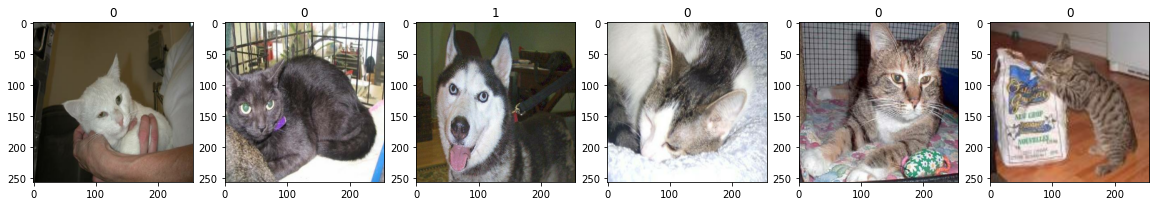

In [62]:
fig, ax = plt.subplots(ncols=6, figsize = (20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [63]:
scaled = batch[0]/255

In [64]:
scaled.max()

1.0

#### PREPROCESSING THE DATA

In [65]:
data = data.map(lambda x,y: (x/255,y))

In [66]:
scaled_iteration = data.as_numpy_iterator()

In [67]:
scaled_iteration.next()[0].min()

0.0

In [68]:
batch = scaled_iteration.next()

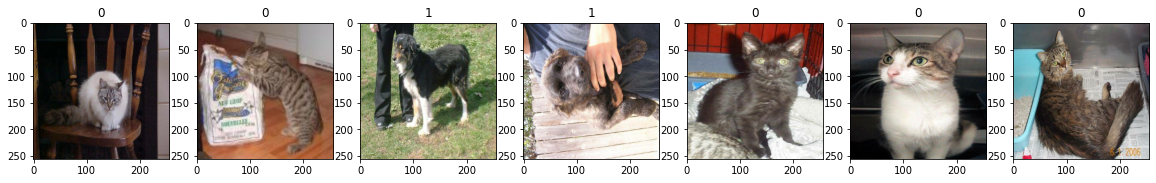

In [69]:
fig, ax = plt.subplots(ncols=7, figsize = (20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#### SPLIT THE DATA

In [70]:
len(data)

251

In [71]:
251*.251

63.001

In [72]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [73]:
train_size+val_size+test_size

252

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [75]:
len(test)

25

## Model building

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [77]:
model = Sequential()

In [78]:
model.add(Conv2D(16, (3, 3),1, input_shape=(256,256,3), activation='relu'))
model.add(MaxPooling2D())

In [79]:
model.add(Conv2D(32, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())
          
          
model.add(Conv2D(16, (3, 3),1, activation='relu'))         
model.add(MaxPooling2D())

          
model.add(Flatten())
          
          
          
model.add(Dense(256, activation='relu'))            
model.add(Dense(1, activation='sigmoid'))            
          
          

In [80]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into a fully connected layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Output laye

In [83]:
# Compile the model
model.compile(optimizer='adam', loss='_crossentropy', metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to the range [0, 1]
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,   # Random zoom
    horizontal_flip=True  # Randomly flip images horizontally
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set",
    target_size=(64, 64),  # Resize input images to 64x64 pixels
    batch_size=32,
    class_mode='binary'  
)



Found 8005 images belonging to 2 classes.


In [84]:

# Train the model
model.fit(train_generator, epochs=10, steps_per_epoch=len(train_generator))

# Save the model


# To make predictions, load the model and use model.predict()
# For example:
loaded_model = tf.keras.models.load_model('cat_dog_classifier.h5')
prediction = loaded_model.predict(new_image)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\losses.py", line 2653, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\losses.py", line 2600, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\saving\legacy\serialization.py", line 543, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: '_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [85]:
model.save('cat_dog_classifier.keras')

In [86]:

new_image = r"C:\Users\MMM\Downloads\deep learning - Copy\big dog breed classification\dog_v1\poodle\1_YmhrhHaHY3B3ugjKemZ6cQ.png"

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

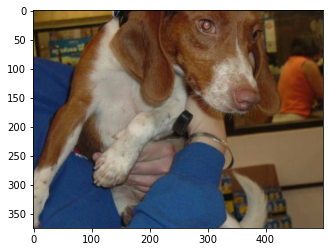

In [89]:
show_image(r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set\dogs\dog.96.jpg")

In [90]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

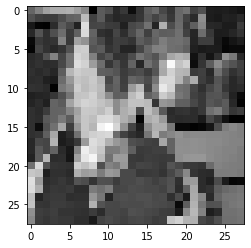

In [91]:
image = load_and_scale_image(r"C:\Users\MMM\Downloads\deep learning - Copy\dog and cat\training_sets\training_set\dogs\dog.96.jpg")
plt.imshow(image, cmap='gray')

In [92]:
image = image_utils.img_to_array(image)
image= image.reshape(1,28,28,1)
image= image/255

In [93]:
prediction = model.predict(image)
print(prediction)

ValueError: in user code:

    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\MMM\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 28, 28, 1)


In [94]:
import numpy as np
np.argmax(prediction)

NameError: name 'prediction' is not defined

In [95]:
# Alphabet does not contain j or z because they require movement
alphabet = "abcdefghiklmnopqrstuvwxy"

In [96]:
alphabet[np.argmax(prediction)]

NameError: name 'prediction' is not defined